In [1]:
from config_path import add_to_sys_path
add_to_sys_path()  # Call the function to add path

import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex,display
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette('terrain')
from Energy_Levels import MoleculeLevels
from Energy_Levels import branching_ratios, Calculate_TDMs
np.set_printoptions(precision=5, suppress=True)

In [2]:
%matplotlib inline

In [3]:
N_list = [1,2]
print(N_list)

[1, 2]


In [5]:
# X010 = MoleculeLevels.initialize_state('CaOH','40','X010',N_list,M_values = 'custom',I=[0,1/2],S=1/2,round=16,M_range=[1])
X010 = MoleculeLevels.initialize_state('CaOH','40','X010',N_list,M_values = 'all',I=[0,1/2],S=1/2,round=8)

In [6]:
B0 = 1e-3
E0 = 0
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')

In [7]:
N_idx = [X010.select_q({'N':N}) for N in N_list]

(-3.5, 3.5)

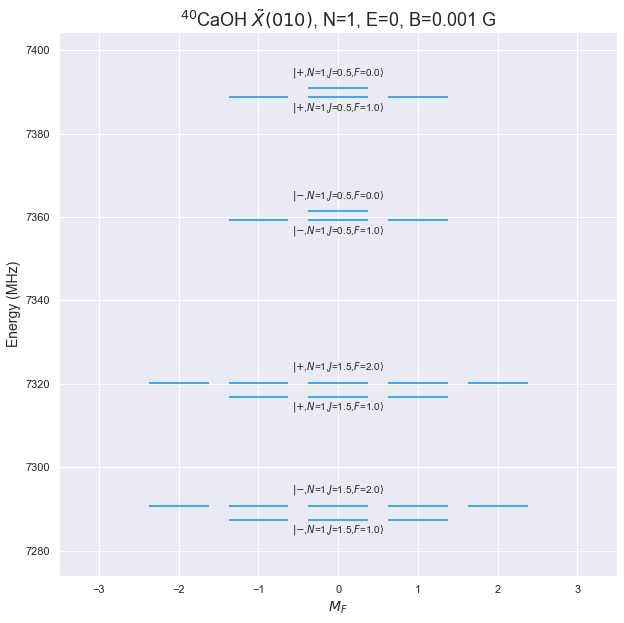

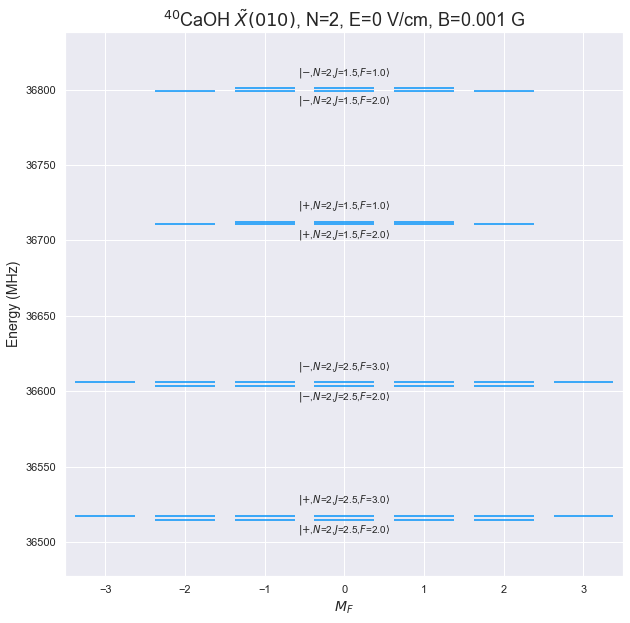

In [8]:
N=1
X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
plt.title(X010.state_str+', N={}, E={}, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)

N=2
X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
plt.title(X010.state_str+', N={}, E={} V/cm, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)

In [28]:
Bz = np.linspace(1e-6,5,1000)
Ez = np.linspace(0,240,10000)

In [29]:
X010.StarkMap(Ez,0,plot=False)

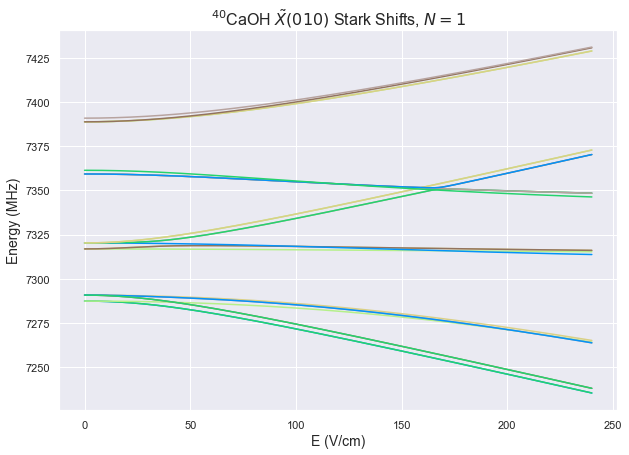

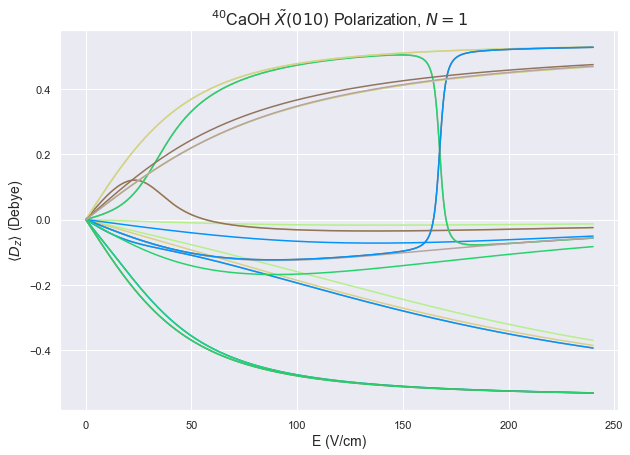

In [30]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[0]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[0]]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad*1.986)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'$\langle D_z \rangle$ (Debye)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

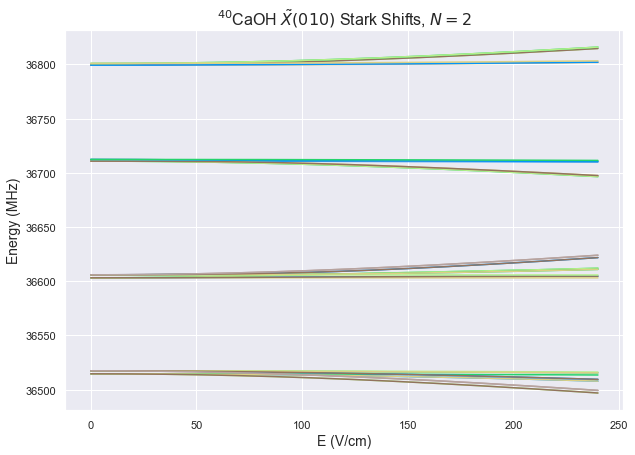

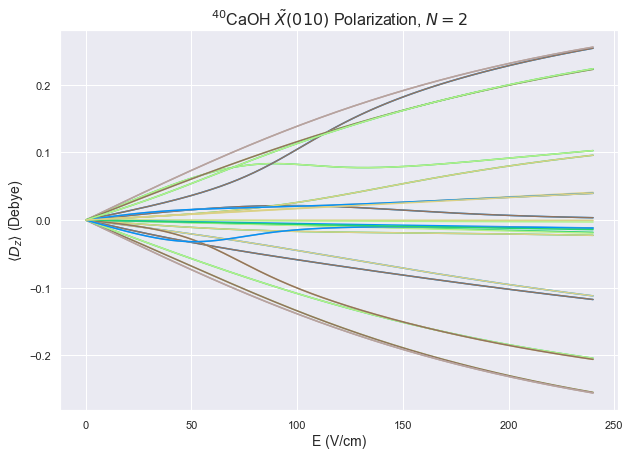

In [31]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[1]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=2$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[1]]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad*1.986)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'$\langle D_z \rangle$ (Debye)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=2$',fontsize=16);

In [40]:
B0 = 1e-6
E0 = 1000
evals, evecs = X010.eigensystem(E0,B0,order=True,method='torch')

In [45]:
M0_idx = X010.select_q({'M':[0]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.0001,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
#     print('Case A:')
#     display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','J','F','Sigma','P','M'],round=4)))
    print('Case B:')
    print('Parity=',X010.parities[i])
    display(Latex(X010.gen_state_str(i,thresh=0.05,round=4)))
    print('\n')

[ 6  7  8 11 12 15 22 23 32 35 40 41 48 49 58 59]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= 1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case B:
Parity= -1.0


<IPython.core.display.Latex object>

(-3.5, 3.5)

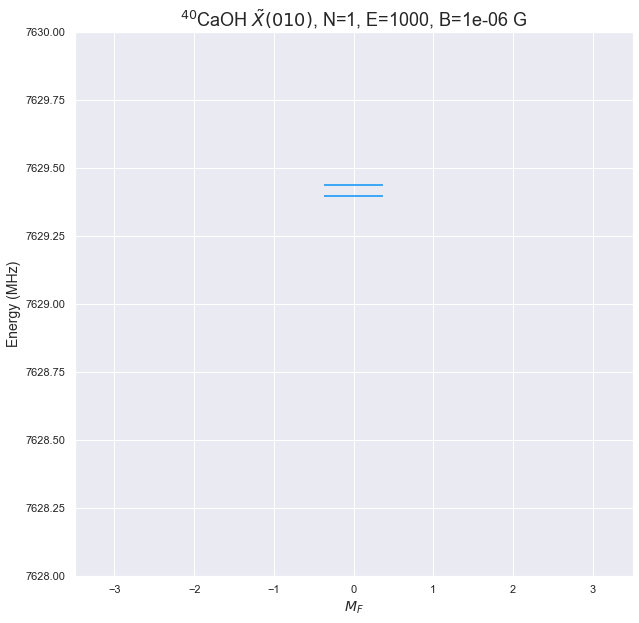

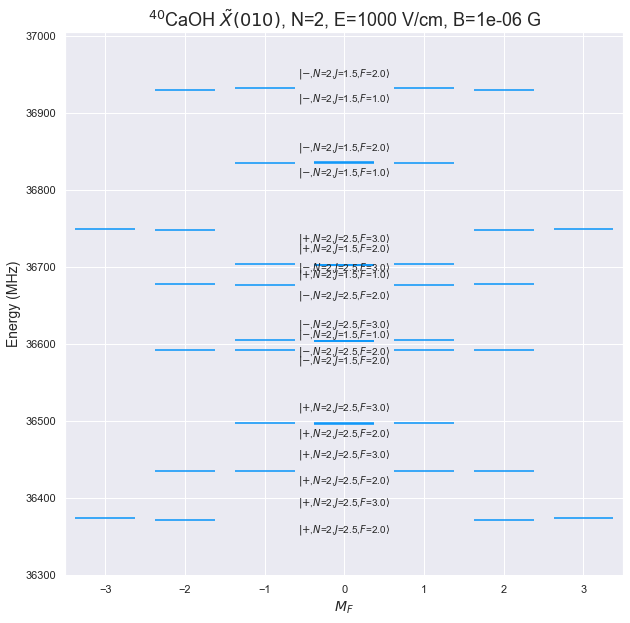

In [44]:
N=1
X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
plt.title(X010.state_str+', N={}, E={}, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)
plt.ylim(7628,7630)

N=2
X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
plt.title(X010.state_str+', N={}, E={} V/cm, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)

In [13]:
E0=60.5
B0=1e-3
TDM0 = 1.465*Calculate_TDMs(0,X010,X010,E0,B0)
TDMp = 1.465*Calculate_TDMs(1,X010,X010,E0,B0)
TDMm = 1.465*Calculate_TDMs(-1,X010,X010,E0,B0)
TDMx = -1/np.sqrt(2)*(TDMp - TDMm)

Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ
Successfully converted eigenvectors from bBJ to aBJ


In [14]:
def l2s(inputlist):
      """
      Convert a flatten list to a list of slices:
      test = [0,2,3,4,5,6,12,99,100,101,102,13,14,18,19,20,25]
      list_to_slices(test)
      -> [(0, 0), (2, 6), (12, 14), (18, 20), (25, 25), (99, 102)]
      """
      inputlist.sort()
      pointers = np.where(np.diff(inputlist) > 1)[0]
      pointers = zip(np.r_[0, pointers+1], np.r_[pointers, len(inputlist)-1])
      slices = [(inputlist[i], inputlist[j]+1) for i, j in pointers]
      return slices

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_3744/1286274734.py:40: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mat, ax=ax,fraction=0.015, pad=0.05)


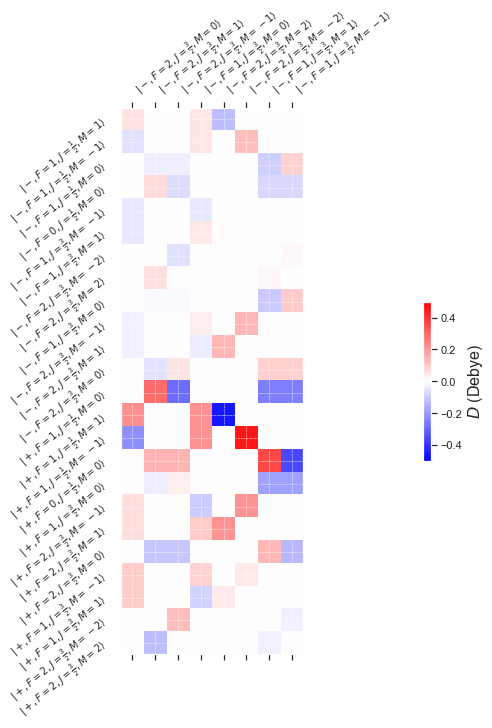

In [24]:
fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
# ax.set_aspect('equal')
N1_all = X010.select_q({'N':1,})
N2_all = X010.select_q({'N':2,'J':1.5},parity='-')
N1s = l2s(N1_all)[0]
N2s = l2s(N2_all)[0]
N1 = np.arange(*N1s)
N2 = np.arange(*N2s)
log=False
BR_plot = TDMx #convert MHz/V/cm to Debye
if log:
    BR_plot=np.log10(BR_plot)
    vmin = -10
    vmax = 0
else:
    vmin=None
    vmax = None
#     log_BR = np.copy(BR0)
#     for i,val1 in enumerate(log_BR):
#         for j,val2 in enumerate(val1):
#             if val2 !=0:
#                 log_BR[i,j] = np.log10(val2)
#     BR_plot = log_BR
mat = ax.matshow(BR_plot[slice(*N1s),slice(*N2s)],cmap=plt.get_cmap('bwr'),vmax = 0.5, vmin = -0.5)
x = np.arange(0,len(N2))
y = np.arange(0,len(N1))
ax.set_yticks(y)
ax.set_xticks(x)
x_labels = [X010.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['F','J','M']) for i in N2]
y_labels = [X010.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['F','J','M']) for i in N1]
# x_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N2]
# y_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N1]
ax.set_yticklabels(y_labels, rotation='40', fontsize=12, ha='right')
ax.set_xticklabels(x_labels, rotation='40', fontsize=12,ha='left')
ax.tick_params(axis='both',labelsize=10,direction='out')
ax.grid(True,which='major',color='white',ls='--',linewidth=0.5)
ax.grid(False,which='minor')
(bot,top) = ax.get_ylim()
# ax.set_ylim(bot+0.5, top-0.5)
cbar = fig.colorbar(mat, ax=ax,fraction=0.015, pad=0.05)
cbar.set_label(label=r'$D$ (Debye)',size=16)
#ax.set_xlim(-0.5,x.size+0.5);

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_3744/1585250487.py:41: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(mat, ax=ax,fraction=0.03, pad=0.0,extend='min')


Text(0.5, 1.0, '$|D|$ (Debye)')

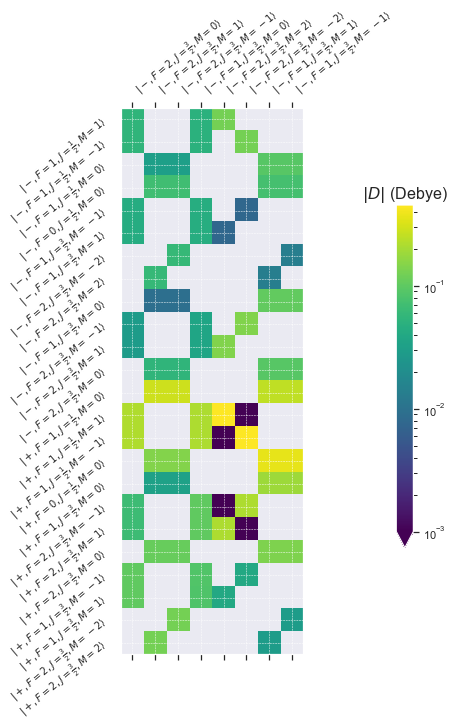

In [25]:
fig,ax = plt.subplots(figsize=(10,10),constrained_layout=True)
# ax.set_aspect('equal')
N1_all = X010.select_q({'N':1})
N2_all = X010.select_q({'N':2,'J':1.5},parity='-')
N1s = l2s(N1_all)[0]
N2s = l2s(N2_all)[0]
N1 = np.arange(*N1s)
N2 = np.arange(*N2s)
log=False
BR_plot = abs(TDMx)
BR_plot[BR_plot<1e-8]=0
if log:
    BR_plot=np.log10(BR_plot)
    vmin = -10
    vmax = 0
else:
    vmin=None
    vmax = None
#     log_BR = np.copy(BR0)
#     for i,val1 in enumerate(log_BR):
#         for j,val2 in enumerate(val1):
#             if val2 !=0:
#                 log_BR[i,j] = np.log10(val2)
#     BR_plot = log_BR
mat = ax.matshow(BR_plot[slice(*N1s),slice(*N2s)],cmap=sns.color_palette("viridis", as_cmap=True),norm=colors.LogNorm(vmin=1e-3))#vmax = vmax, vmin = -3)
x = np.arange(0,len(N2))
y = np.arange(0,len(N1))
ax.set_yticks(y)
ax.set_xticks(x)
x_labels = [X010.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['F','J','M']) for i in N2]
y_labels = [X010.gen_state_str(i,thresh=0.2,single=True,parity=True,show_coeff=False, label_q=['F','J','M']) for i in N1]
# x_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N2]
# y_labels = [X010.gen_state_str(i,thresh=0.3,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_F'],round=2) for i in N1]
ax.set_yticklabels(y_labels, rotation='40', fontsize=12, ha='right')
ax.set_xticklabels(x_labels, rotation='40', fontsize=12,ha='left')
ax.tick_params(axis='both',labelsize=10,direction='out')
ax.grid(True,which='major',color='white',ls='--',linewidth=0.5)
ax.grid(False,which='minor')
(bot,top) = ax.get_ylim()
# ax.set_ylim(bot+0.5, top)
cbar = fig.colorbar(mat, ax=ax,fraction=0.03, pad=0.0,extend='min')
cbar.ax.set_title(label=r'$|D|$ (Debye)',size=16,rotation=0)
#ax.set_xlim(-0.5,x.size+0.5);

In [30]:
from tabulate import tabulate

In [37]:
header_N21 = ['Transition','Estimated Frequency (GHz)','Dipole Moment (D)']
table_N21=[]
N1_p = X010.select_q({'N':1,'J':0.5},parity='+')
N2_n = X010.select_q({'N':2,'J':1.5},parity='+')
dx = abs(TDMx)
factor = 10.207 #pi condition for gaussian pulse with FWHM t expressed in us*Debye*sqrt(uW/cm^2)
for i in N2_n:
    EN2 = X010.evals0[i]
    vecN2 = X010.evecs0[i]
    qi = abs(vecN2).argmax()
    for j in N1_p:
        EN1 = X010.evals0[j]
        vecN1 = X010.evecs0[j]
        qj = abs(vecN1).argmax()
        dE = np.round((EN2 - EN1)/1000,7)
        dipole = np.round(dx[j,i],3)
        if dipole >1e-3:
            Ne,Je,Fe,Me = [X010.q_numbers[_q][qi] for _q in ['N','J','F','M']]
            if Me<0:
                continue
            Pe = {1:'+',-1:'-'}[X010.parities[i]]
            Ng,Jg,Fg,Mg = [X010.q_numbers[_q][qj] for _q in ['N','J','F','M']]
            Pg = {1:'+',-1:'-'}[X010.parities[j]]
            t_str = '(N={Ne}{Pe},J={Je},F={Fe},M={Me})->(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
            e_str = str(dE)
            d_str = str(dipole)
            table_N21.append([t_str,e_str,d_str])
#             intensity = np.round((factor/(100)/dipole)**2,5)
#             display(Latex(r'$D\, (\mathrm{Debye}) = '+str(strength)+r'$'))
#             display(Latex(r'For $\tau_{\mathrm{FWHM}} = 100 \,\mathrm{\mu s}$, $I_{\pi}='+str(intensity)+ r'\,\mathrm{\mu W/cm^2}$'))
#             display(Latex(r'$\Delta E =' +str(dE)+ r'\,\mathrm{MHz}$'))
#             display(Latex(r'$|e \rangle = $' + X010.gen_state_str(i,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'],thresh=0.05,round=4)))
#             display(Latex(r'$|g \rangle = $' + X010.gen_state_str(j,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'],thresh=0.05,round=4)))
#             print('\n')

In [38]:
header_N12 = ['Transition','Estimated Frequency (GHz)','Dipole Moment (D)']
table_N12=[]
N1_n = X010.select_q({'N':1},parity='-')
N2_p = X010.select_q({'N':2},parity='+')
dz = abs(TDM0)
factor = 10.207 #pi condition for gaussian pulse with FWHM t expressed in us*Debye*sqrt(uW/cm^2)
for i in N1_n:
    EN1 = X010.evals0[i]
    vecN1 = X010.evecs0[i]
    qi = abs(vecN1).argmax()
    for j in N2_p:
        EN2 = X010.evals0[j]
        vecN2 = X010.evecs0[j]
        qj = abs(vecN2).argmax()
        dE = np.round((EN2 - EN1)/1000,7)
        dipole = np.round(dz[j,i],3)
        if dipole >1e-4:
            Ne,Je,Fe,Me = [X010.q_numbers[_q][qi] for _q in ['N','J','F','M']]
            if Me<0:
                continue
            Pe = {1:'+',-1:'-'}[X010.parities[i]]
            Ng,Jg,Fg,Mg = [X010.q_numbers[_q][qj] for _q in ['N','J','F','M']]
            Pg = {1:'+',-1:'-'}[X010.parities[j]]
            t_str = '(N={Ne}{Pe},J={Je},F={Fe},M={Me})->(N={Ng}{Pg},J={Jg},F={Fg},M={Mg})'.format(Ne=Ne,Je=Je,Fe=int(Fe),Me=int(Me),Pe=Pe,Ng=Ng,Jg=Jg,Fg=int(Fg),Mg=int(Mg),Pg=Pg)
            e_str = str(dE)
            d_str = str(dipole)
            table_N12.append([t_str,e_str,d_str])
#             intensity = np.round((factor/(100)/dipole)**2,5)
#             display(Latex(r'$D\, (\mathrm{Debye}) = '+str(strength)+r'$'))
#             display(Latex(r'For $\tau_{\mathrm{FWHM}} = 100 \,\mathrm{\mu s}$, $I_{\pi}='+str(intensity)+ r'\,\mathrm{\mu W/cm^2}$'))
#             display(Latex(r'$\Delta E =' +str(dE)+ r'\,\mathrm{MHz}$'))
#             display(Latex(r'$|e \rangle = $' + X010.gen_state_str(i,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'],thresh=0.05,round=4)))
#             display(Latex(r'$|g \rangle = $' + X010.gen_state_str(j,parity=True,single=True,show_coeff=False,label_q=['N','J','F','M'],thresh=0.05,round=4)))
#             print('\n')

In [39]:
table_N21 = sorted(table_N21,key=lambda x: x[1])
table_N12 = sorted(table_N12,key=lambda x: x[1])

In [40]:
print('All transitions at E=0 V/cm, B=1 mG. Only considering z-polarized light. Transitions with M<0 states are ommitted.')
print('Parameters taken from Fletcher et al. 1995.\nAll errors are dominated by hyperfine uncertainty. If hyperfine is within 10% of X(000), errors are ~<300 kHz\n')
print(tabulate(table_N21,headers=header_N21,floatfmt=('','.6f','.3f')))
print()
print(tabulate(table_N12,headers=header_N12,floatfmt=('','.6f','.3f')))

All transitions at E=0 V/cm, B=1 mG. Only considering z-polarized light. Transitions with M<0 states are ommitted.
Parameters taken from Fletcher et al. 1995.
All errors are dominated by hyperfine uncertainty. If hyperfine is within 10% of X(000), errors are ~<300 kHz

Transition                                     Estimated Frequency (GHz)    Dipole Moment (D)
-------------------------------------------  ---------------------------  -------------------
(N=2+,J=1.5,F=2,M=1)->(N=1+,J=0.5,F=0,M=0)                     39.864794                0.080
(N=2+,J=1.5,F=2,M=2)->(N=1+,J=0.5,F=1,M=1)                     39.865288                0.117
(N=2+,J=1.5,F=1,M=1)->(N=1+,J=0.5,F=0,M=0)                     39.865832                0.012
(N=2+,J=1.5,F=2,M=1)->(N=1+,J=0.5,F=1,M=0)                     39.866432                0.068
(N=2+,J=1.5,F=2,M=0)->(N=1+,J=0.5,F=1,M=-1)                    39.866502                0.017
(N=2+,J=1.5,F=2,M=0)->(N=1+,J=0.5,F=1,M=1)                     39.866502

In [237]:
import csv

def write_labeled_CSV_rows(data_array,file_path,label_array):
    data_array = np.array(data_array)
    save_all = []
    save_all.append(label_array)
    for _data in data_array:
        save_all.append(_data)
    writeCSVrows(save_all,file_path)
    
def writeCSVrows(array_of_arrays,filepath):
    with open(filepath,'w+',newline='') as f:
        w = csv.writer(f)
        for array in array_of_arrays:
            w.writerow(array)
    print('Done! Array written to', filepath)
    return

In [238]:
write_labeled_CSV_rows(table_N21,'CaOH_X010_N21_lines.csv',header_N21)
write_labeled_CSV_rows(table_N12,'CaOH_X010_N12_lines.csv',header_N12)

Done! Array written to CaOH_X010_N21_lines.csv
Done! Array written to CaOH_X010_N12_lines.csv


In [83]:
x_labels = [X010.gen_state_str(i,thresh=0.1,single=True,parity=False,show_coeff=True, basis='decoupled',label_q=['K','M_N','M_S','M_I','M_F'],round=2) for i in N2]
display(Latex(x_labels[7]))

<IPython.core.display.Latex object>

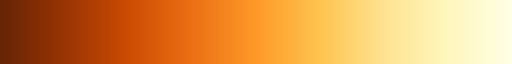

In [68]:
sns.color_palette("YlOrBr_r", as_cmap=True)

In [123]:
Bz = np.linspace(1e-6,5,1000)
Ez = np.linspace(0,200,1000)

In [124]:
X010.StarkMap(Ez,1e-3,plot=False)
# X010.plot_evals_EB('E',kV_kG=True,GHz=True)

In [108]:
X010.ZeemanMap(Bz,0,plot=False)

In [135]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_B.T[N2]):
    plt.plot(Bz,trace)
plt.xlabel('B (G)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Zeeman Shifts, $N=2-$',fontsize=16);
plt.ylim(49865,49885)

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N1]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Bz,grad)
plt.xlabel('B (G)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Magnetization, $N=2-$',fontsize=16);

AttributeError: 'NoneType' object has no attribute 'T'

<Figure size 720x504 with 0 Axes>

(9900.0, 10090.0)

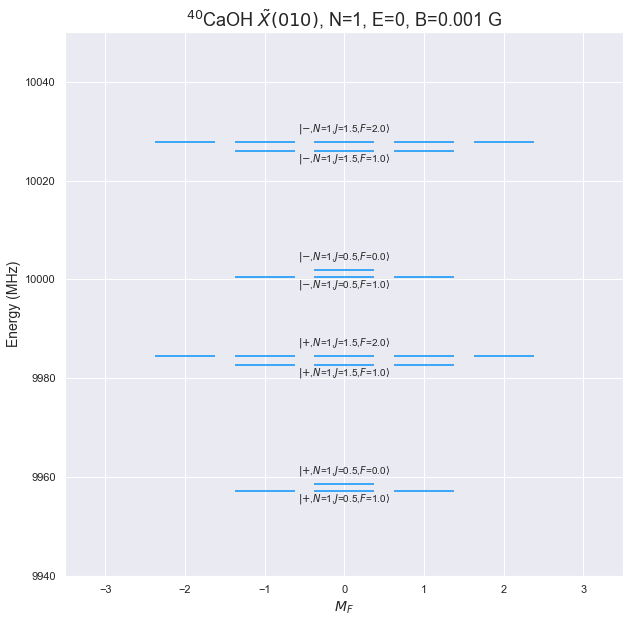

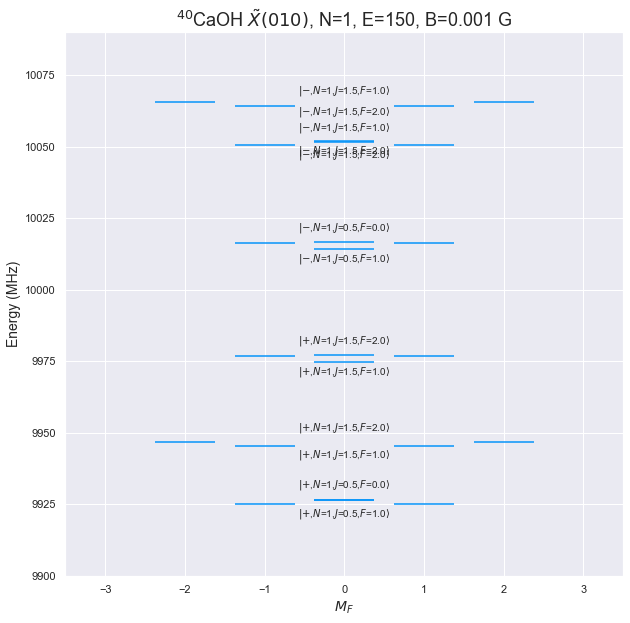

In [57]:
E0=0
B0=1e-3
N=1
X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
plt.title(X010.state_str+', N={}, E={}, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)
plt.ylim(9940,10050)

E0=150
B0=1e-3
N=1
X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
plt.title(X010.state_str+', N={}, E={}, B={} G'.format(N,E0,B0),fontsize=18)
plt.xlim(-3.5,3.5)
plt.ylim(9900,10090)

# N=2
# X010.display_levels(E0,B0,'F',idx=N_idx[N-1],parity=True,label_q=[q for q in X010.q_str if q!='K'],figsize=(10,10),alt_label=True)
# plt.title(X010.state_str+', N={}, E={} V/cm, B={} G'.format(N,E0,B0),fontsize=18)
# plt.xlim(-3.5,3.5)

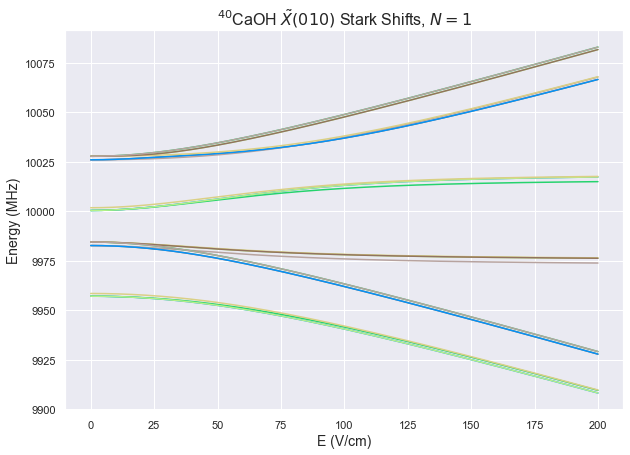

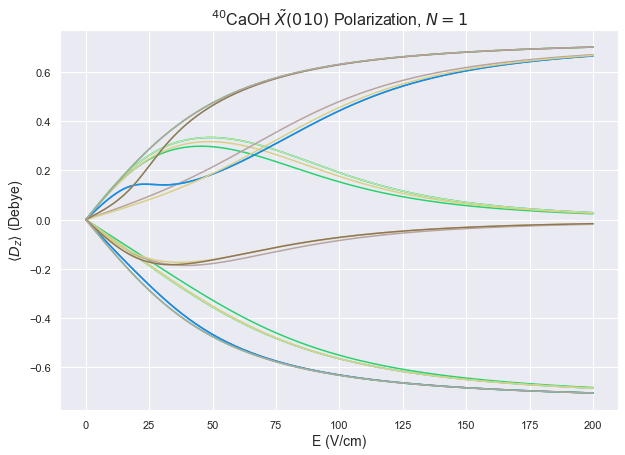

In [133]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[0]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[0]]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad*1.986)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'$\langle D_z \rangle$ (Debye)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

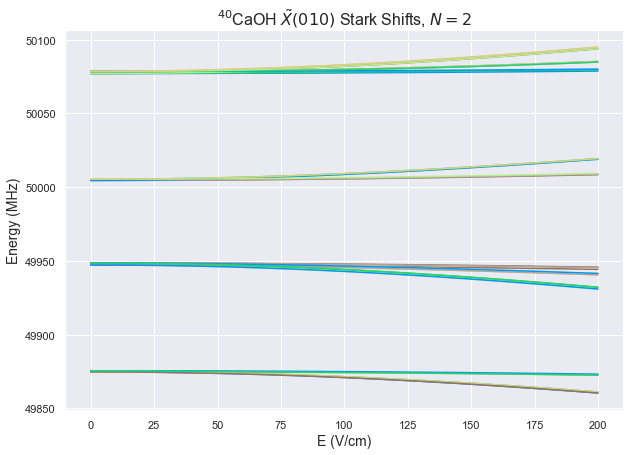

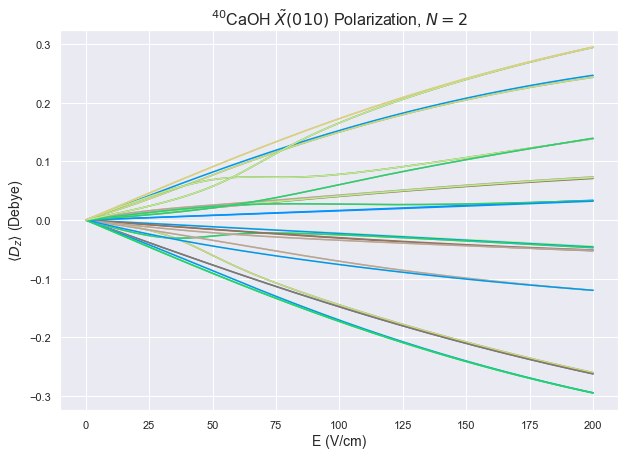

In [134]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[1]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=2$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N_idx[1]]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad*1.986)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'$\langle D_z \rangle$ (Debye)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=2$',fontsize=16);

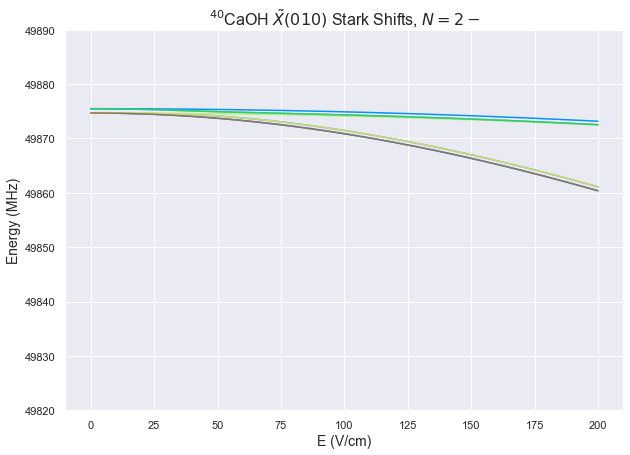

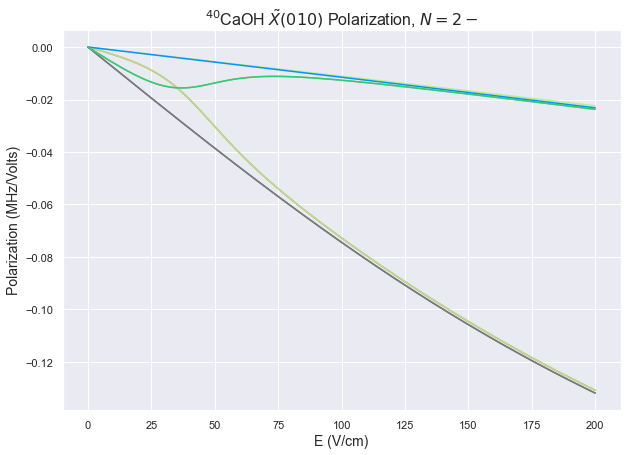

In [135]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N2_all]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=2-$',fontsize=16);
plt.ylim(49820,49890)

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T[N2_all]):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=2-$',fontsize=16);

In [36]:
X010.display_levels(0,1e-6,'F',idx=N1_all,label_q=[q for q in X010.q_str if q!='K'],alt_label=True)
plt.title(X010.state_str+', N=1d',fontsize=18)

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, N=1,2, Free Field')

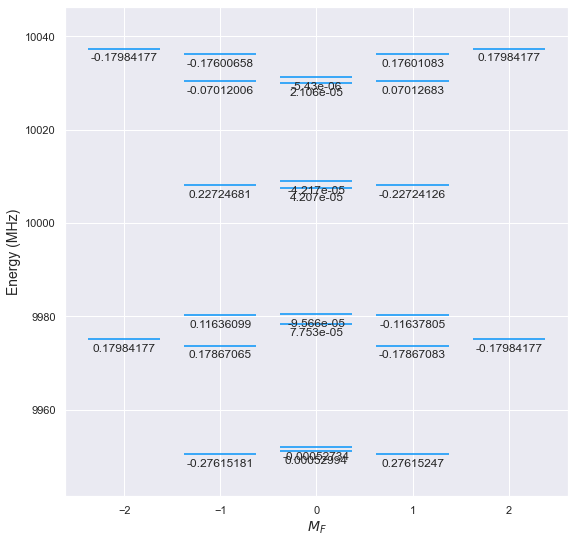

In [130]:
# X010 = MoleculeLevels.initialize_state('CaOH','40','X010',N_list,M_values = 'custom',I=[0,1/2],S=1/2,round=16,M_range=[1])
X010 = MoleculeLevels.initialize_state('CaOH','40','X010',[1],M_values = 'all',I=[0,1/2],S=1/2,round=8)
X010.display_PTV(60.8,1e-3,'EDM')

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, N=1,2 60 V/cm, 1e-06 G')

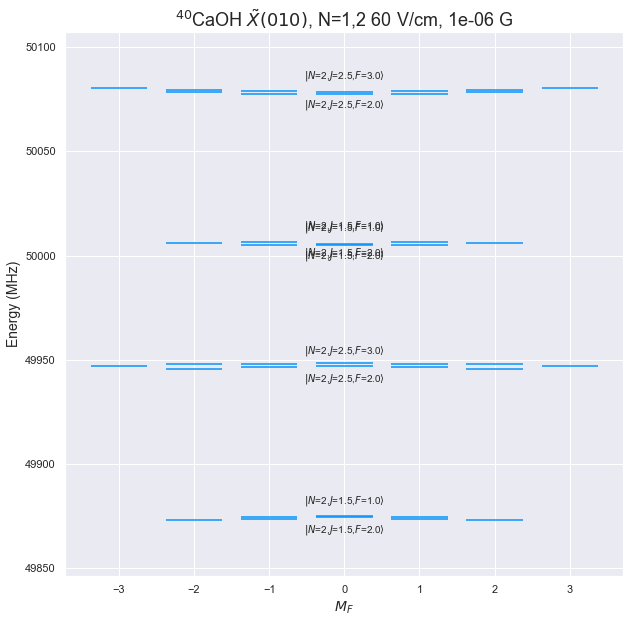

In [14]:
Efield = 60
Bfield = 1e-6
X010.display_levels(Efield,Bfield,'F',idx=N2,label_q=[q for q in X010.q_str if q!='K'],alt_label=True)
plt.title(X010.state_str+', N=1,2 {} V/cm, {} G'.format(Efield,Bfield),fontsize=18)

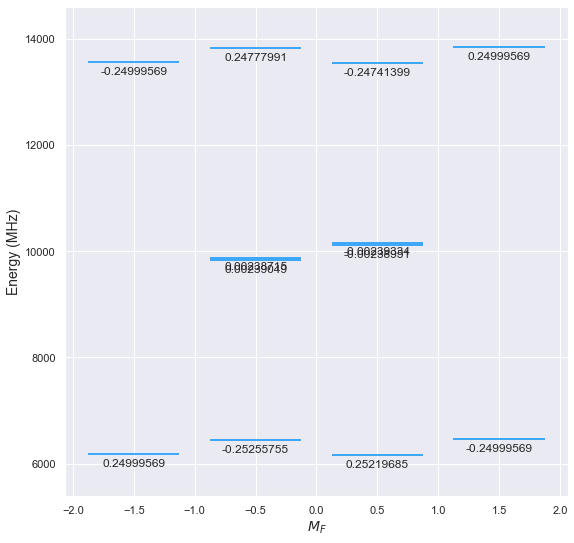

In [41]:
X010.display_PTV(,'EDM')

In [34]:
evals, evecs = X010.eigensystem(Efield,Bfield,order=True,method='torch')
M0_idx = X010.select_q({'M':[-3/2,-1/2,1/2,3/2]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','J','F','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.05,round=4)))
    print('\n')

[ 0  1  2  3  4  5  6  7  8  9 10 11]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

In [117]:
evals, evecs = X010.eigensystem(1000,1e-8,order=True,method='torch')
M0_idx = X010.select_q({'M':[0]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.01,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.01,label_q=['J','K','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.01,round=4)))
    print('\n')

[ 2  3  8 11 12 15 18 19]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

In [42]:
Bz = np.linspace(1e-6,40,1000)
Ez = np.linspace(0,500,1000)

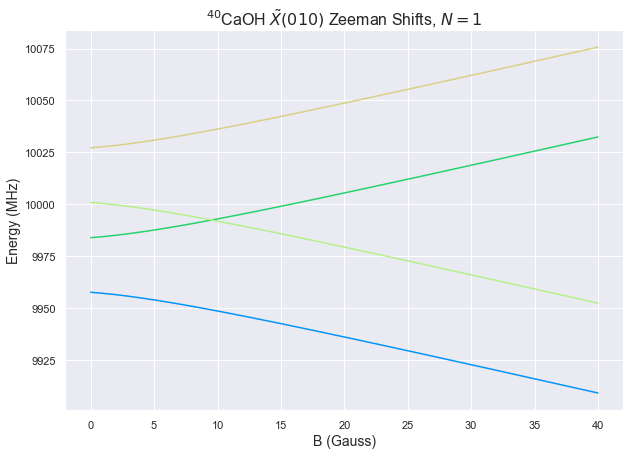

In [75]:
X010.ZeemanMap(Bz,0,plot=True)

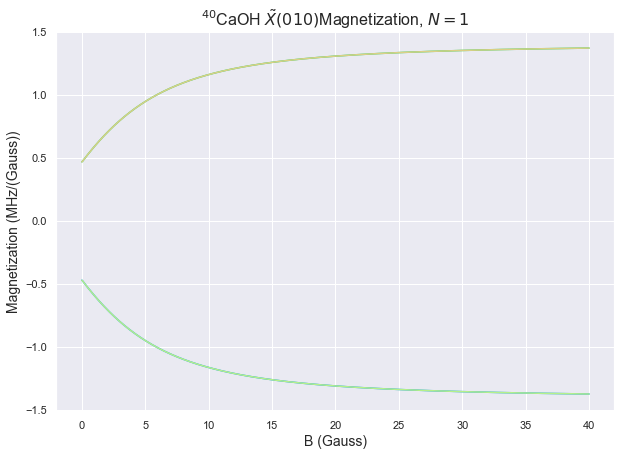

In [76]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_B.T):
    grad = np.gradient(trace)/(Bz[1]-Bz[0])
    plt.plot(Bz,grad)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Magnetization (MHz/(Gauss))',fontsize=14)
plt.title(X010.state_str + r'Magnetization, $N={}$'.format(*X010.N_range),fontsize=16);

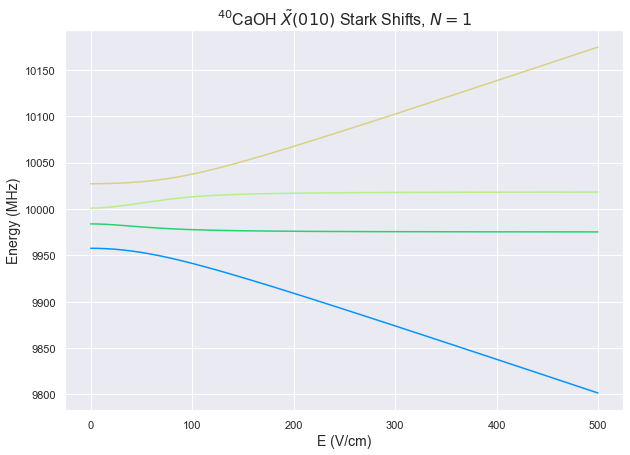

In [78]:
X010.StarkMap(Ez,1e-6,plot=True)
# X010.plot_evals_EB('E',kV_kG=True,GHz=True)

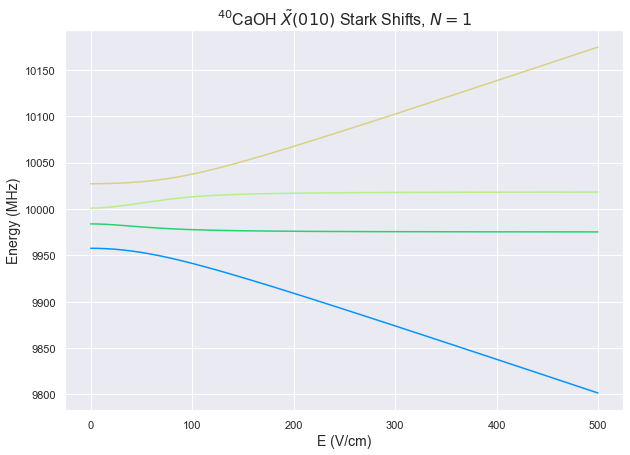

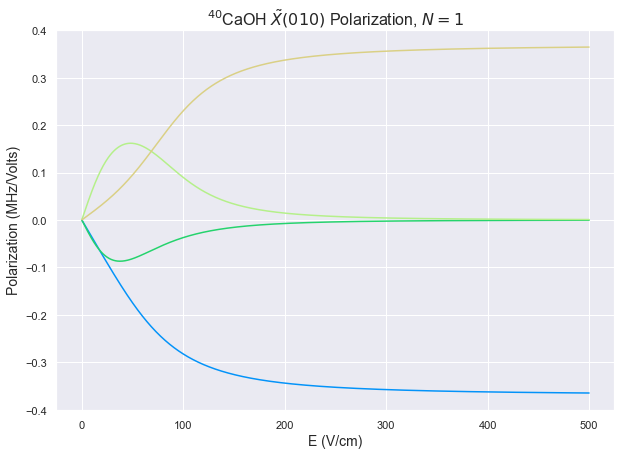

In [98]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010.evals_E.T):
    grad = np.gradient(trace)/(Ez[1]-Ez[0])
    plt.plot(Ez,grad)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (MHz/Volts)',fontsize=14)
plt.title(r'$^{40}$CaOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

We can display a plot of the energy levels at arbitray field. (The code does not handle parity labeling well, so I am leaving out L for zero field.)

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, N=1, 0.5 kV/cm')

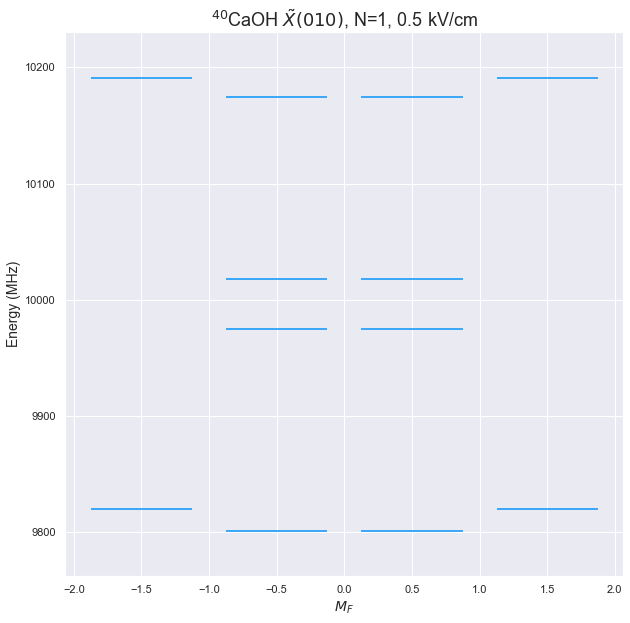

In [47]:
X010.display_levels(500,1e-7,'F',label=None,alt_label=True)
plt.title(X010.state_str+', N=1, 0.5 kV/cm',fontsize=18)

We can also look at PT violating shifts. Here, we consider the EDM shifts as a function of E field. 

In [48]:
X010.eigensystem(0,1e-8);

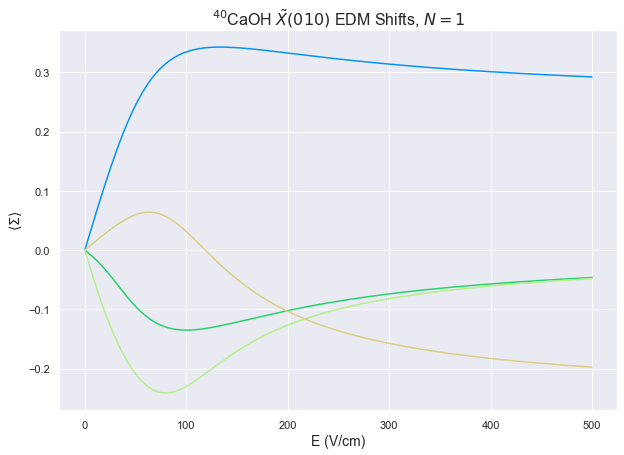

In [85]:
X010.PTV_Map('EDM',E_or_B='E',plot=True)

We can look specifically at the upper and lower Stark manifolds at a given field value too.

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, EDM shifts at 60.8 V/cm')

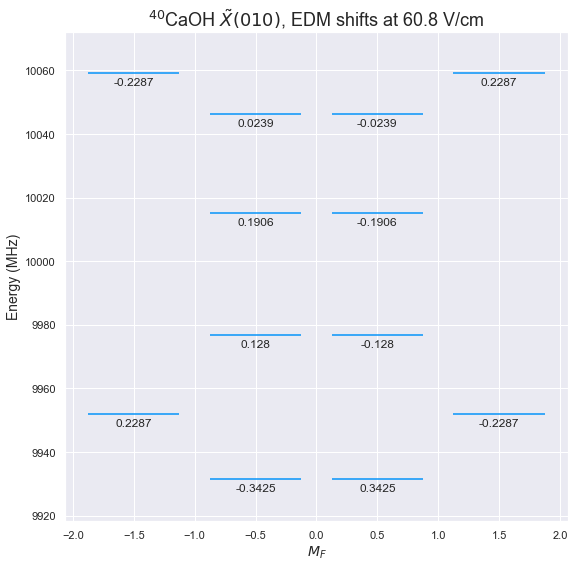

In [51]:
X010.display_PTV(133,1e-7,'EDM',round=4)
plt.title(X010.state_str+', EDM shifts at 60.8 V/cm',fontsize=18)

In [60]:
X010.eigensystem(1000,0)
M0_idx = X010.select_q({'M':[1]})
print(M0_idx)
print('\n')
for i in M0_idx:
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.01,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.01,label_q=['K','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.01,round=4)))
    print('\n')

[0 1 2 3 4 5]




<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

In [50]:
X010.eigensystem(100,1e-2)
(sy.Matrix(X010.evecs0[0]).T*X010.H_symbolic*sy.Matrix(X010.evecs0[0]))[0]

-0.048487643331535*Bz - 0.277154404334809*Ez + 9969.35364112334

In [43]:
(sy.Matrix(X010.evecs0[1]).T*X010.H_symbolic*sy.Matrix(X010.evecs0[1]))[0]

1.28069264538709*Bz - 0.368490639112473*Ez + 9987.63731699745

In [20]:
import matrix_elements_sym as me
from functools import partial
from matrix_elements_sym import decouple_b_even

def H_even_X(q_numbers,params,matrix_elements,symbolic=True,E=0,B=0,M_values='all',precision=5):
    q_str = list(q_numbers)     # Get keys for quantum number dict
    if symbolic:
        Ez,Bz = sy.symbols('E_z B_z')
        size = len(q_numbers[q_str[0]])
        # Need to construct empty matrices to fill with matrix elements
        # Sympy does not like numpy arrays, so convert to list
        H0 = np.zeros((size,size)).tolist()
        V_B = np.zeros((size,size)).tolist()
        V_E = np.zeros((size,size)).tolist()
        #Iz = np.zeros((size,size)).tolist()
        #Sz = np.zeros((size,size)).tolist()
        for i in range(size):
            for j in range(size):
                # State out is LHS of bra ket, state in is RHS
                state_out = {q+'0':q_numbers[q][i] for q in q_str}
                state_in = {q+'1':q_numbers[q][j] for q in q_str}
                q_args = {**state_out,**state_in}
                elements = {term: sy.nsimplify(element(**q_args)) for term, element in matrix_elements.items()}
                # The Hamiltonian
                H0[i][j] = params['Be']*elements['N^2'] + params['Gamma_SR']*elements['N.S'] + \
                    params['bF']*elements['I.S'] + params['c']/3*sy.sqrt(6)*elements['T2_0(I,S)']
                if params.get('q_lD') is not None:
                    H0[i][j] += params['q_lD']/2*elements['l-doubling'] - params['Gamma_SR']*elements['NzSz']+params['Gamma_Prime']*elements['NzSz']
                if M_values!='none':
                    V_B[i][j]+=params['g_S']*params['mu_B']*elements['ZeemanZ']
                    V_E[i][j]+=-params['muE']*elements['StarkZ']
                # H[i][j] = round(H[i][j],precision)
                #Iz[i][j] = params['c']*elements['Iz']
                #Sz[i][j] = elements['Sz']
        # Need to construct IzSz term and add to Hamiltonian
        #H=matadd(H,matmult(Iz,Sz))
        # Create symbolic object
        H_symbolic = sy.Matrix(H0)+Ez*sy.Matrix(V_E)+Bz*sy.Matrix(V_B)
#         H0_num = np.array(H0).astype(np.float64)
#         V_E_num = np.array(V_E).astype(np.float64)
#         V_B_num = np.array(V_B).astype(np.float64)
        # Use symbolic object to create function that given E and B values, returns a numpy array
#         H_func = lambda E,B: H0_num + V_E_num*E + V_B_num*B
        # H_func = sy.lambdify((Ez,Bz), H_symbolic, modules='numpy')
        return H_symbolic

def decouple_b(input_qnumbers,output_qnumbers,S=1/2,I=1/2):
    input_keys = list(input_qnumbers)
    output_keys = list(output_qnumbers)
    input_size = len(input_qnumbers[input_keys[0]])
    output_size = len(output_qnumbers[output_keys[0]])
    basis_matrix = np.zeros((output_size,input_size)).tolist()
    for i in range(output_size):
        for j in range(input_size):
            decoupled_qnumbers = {q:output_qnumbers[q][i] for q in output_keys}
            b_qnumbers = {q:input_qnumbers[q][j] for q in input_keys}
            basis_matrix[i][j] = sy.nsimplify(decouple_b_even(decoupled_qnumbers,b_qnumbers,S=S,I=I))
    return basis_matrix
   
    

bBJ_even_X_matrix_elements={
        # Fine Structure
        'N^2': me.Rot_bBJ,                 # N^2 Rotation
        'N.S': me.SR_bBJ,                  # N.S Spin Rotation
        'l-doubling': me.lD_bBJ,           # Effective l doubling
        'NzSz': me.NzSz_bBJ,               # NzSz for bending mode

        # Hydrogen Hyperfine
        'I.S': me.IS_bBJ,                  # I.S Fermi Contact Interaction
        'T2_0(I,S)': me.T2IS_bBJ,          # I S dipolar interaction
        'Iz': me.Iz_bBJ,                   # I.n projection of I on internuclear axis n
        'Sz': me.Sz_bBJ,                   # S.n projection of S on internuclear axis n
        }

ext_fields = {
# External Fields
'ZeemanZ': me.ZeemanZ_bBJ,         # Zeeman interaction with lab z magnetic field
'StarkZ': me.StarkZ_bBJ            # Stark interaction with lab z electric field
}
bBJ_even_X_matrix_elements.update(ext_fields)
for term,element in bBJ_even_X_matrix_elements.items():       #iterate through, substitute hydrogen proton value
            bBJ_even_X_matrix_elements[term] = partial(element,I=1/2)

        

B,gamma,gammap, bF,c,b,q_lD,muE,muB,g_S,g_L = sy.symbols('B_{rot} gamma gamma^\' b_F c b q_{lD} D mu_B g_S g_L')
params_40X010 = {
'Be': B,
'Gamma_SR': gamma,
'Gamma_Prime': gammap,
'bF': 0,
'c': 0,
'b': b,
'q_lD': q_lD,
'muE': muE,
'mu_B': muB, #MHz/Gauss
'g_S': g_S,
'g_L': g_L,
}

def build_operator(q_numbers,parameter,operator_element,M_values='all',precision=5):
    q_str = list(q_numbers)     # Get keys for quantum number dict
    size = len(q_numbers[q_str[0]])
    # Need to construct empty matrices to fill with matrix elements
    # Sympy does not like numpy arrays, so convert to list
    H0 = np.zeros((size,size)).tolist()
    #Iz = np.zeros((size,size)).tolist()
    #Sz = np.zeros((size,size)).tolist()
    for i in range(size):
        for j in range(size):
            # State out is LHS of bra ket, state in is RHS
            state_out = {q+'0':q_numbers[q][i] for q in q_str}
            state_in = {q+'1':q_numbers[q][j] for q in q_str}
            q_args = {**state_out,**state_in}
            operator = sy.nsimplify(operator_element(**q_args))
            H0[i][j]+= parameter*operator
    H_symbolic = sy.Matrix(H0)
    return H_symbolic

In [21]:
H_sym = H_even_X(X010.q_numbers,params_40X010,bBJ_even_X_matrix_elements,symbolic=True,E=0,B=0,M_values='all',precision=8)

In [22]:
(H_sym)

Matrix([
[            B_{rot} - gamma/2 - gamma^'/2,                                   -q_{lD},                                                        0,                                                        0,                 -B_z*g_S*mu_B/6 + D*E_z/3,                                         0,                                                         0,                                                         0,                                                               0,                                                               0, -sqrt(2)*B_z*g_S*mu_B/3 + sqrt(2)*D*E_z/6,                                         0,                                                              0,                                                              0,                                                         0,                                                         0,                                                         0,                                                         0,     

In [23]:
NzSz = build_operator(X010.q_numbers,params_40X010['Gamma_Prime'],bBJ_even_X_matrix_elements['NzSz'],precision=8)
NS = build_operator(X010.q_numbers,params_40X010['Gamma_SR'],bBJ_even_X_matrix_elements['N.S'],precision=8)

In [24]:
NS-NzSz

Matrix([
[-gamma + gamma^'/2,                  0,                  0,                  0,                  0,                  0,                  0,                  0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0],
[                 0, -gamma + gamma^'/2,                  0,                  0,                  0,                  0,                  0,                  0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                   0,                  

In [25]:
inputt = X010.q_numbers
output = X010.alt_q_numbers['decoupled']
basis_matrix = sy.Matrix(decouple_b(inputt,output,I=1/2))

In [26]:
H_dcpl = basis_matrix*H_sym*basis_matrix.T

In [27]:
NzSz_dcpl = basis_matrix*NzSz*basis_matrix.T
NS_dcpl = basis_matrix*NS*basis_matrix.T

In [28]:
SR_dcpl = NS_dcpl-NzSz_dcpl

In [29]:
SR_dcpl

Matrix([
[gamma/2 - gamma^'/4,                   0,                   0,                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                                   0,                   0,                   0,                   0,                   0],
[                  0, gamma/2 - gamma^'/4,                   0,                   0,                                   0,                                   0,                                   0,                                  

In [24]:
ilist = range(0,24)
for i in ilist:
    print(i)
    for k,v in X010.alt_q_numbers['decoupled'].items():
        print('{} = {}'.format(k,v[i]))

0
K = -1
N = 1
M_N = -1
M_S = -0.5
M_I = 0
M_F = -1.5
1
K = 1
N = 1
M_N = -1
M_S = -0.5
M_I = 0
M_F = -1.5
2
K = -1
N = 1
M_N = -1
M_S = 0.5
M_I = 0
M_F = -0.5
3
K = 1
N = 1
M_N = -1
M_S = 0.5
M_I = 0
M_F = -0.5
4
K = -1
N = 1
M_N = 0
M_S = -0.5
M_I = 0
M_F = -0.5
5
K = 1
N = 1
M_N = 0
M_S = -0.5
M_I = 0
M_F = -0.5
6
K = -1
N = 1
M_N = 0
M_S = 0.5
M_I = 0
M_F = 0.5
7
K = 1
N = 1
M_N = 0
M_S = 0.5
M_I = 0
M_F = 0.5
8
K = -1
N = 1
M_N = 1
M_S = -0.5
M_I = 0
M_F = 0.5
9
K = 1
N = 1
M_N = 1
M_S = -0.5
M_I = 0
M_F = 0.5
10
K = -1
N = 1
M_N = 1
M_S = 0.5
M_I = 0
M_F = 1.5
11
K = 1
N = 1
M_N = 1
M_S = 0.5
M_I = 0
M_F = 1.5
12


IndexError: list index out of range

In [25]:
vec = np.zeros(24)
vec[6] = 1/sy.sqrt(2) #
vec[17] = 1/sy.sqrt(2)

In [26]:
NS_dcpl-NzSz_dcpl

Matrix([
[gamma/4,       0,               0,               0,               0,               0,               0,               0,               0,               0,       0,       0],
[      0, gamma/4,               0,               0,               0,               0,               0,               0,               0,               0,       0,       0],
[      0,       0,        -gamma/4,               0, sqrt(2)*gamma/4,               0,               0,               0,               0,               0,       0,       0],
[      0,       0,               0,        -gamma/4,               0, sqrt(2)*gamma/4,               0,               0,               0,               0,       0,       0],
[      0,       0, sqrt(2)*gamma/4,               0,               0,               0,               0,               0,               0,               0,       0,       0],
[      0,       0,               0, sqrt(2)*gamma/4,               0,               0,               0,               0, 

In [27]:
H_dcpl=sy.simplify(H_dcpl)
H_dcpl

Matrix([
[-B_z*g_S*mu_B/2 + B_{rot} - D*E_z/2 + gamma/4,                                       -q_{lD},                                            0,                                            0,                         0,                         0,                        0,                        0,                                             0,                                             0,                                            0,                                            0],
[                                      -q_{lD}, -B_z*g_S*mu_B/2 + B_{rot} + D*E_z/2 + gamma/4,                                            0,                                            0,                         0,                         0,                        0,                        0,                                             0,                                             0,                                            0,                                            0],
[                              

In [135]:
X010.eigensystem(1000,0)
even = sy.Matrix([0,1/sy.sqrt(2),0,0,0,0,1/sy.sqrt(2),0])
odd = sy.Matrix([1/sy.sqrt(2),0,0,0,0,0,0,-1/sy.sqrt(2)])
x = sy.simplify(even.T*H_dcpl*even)
y = sy.simplify(odd.T*H_dcpl*odd)
x[0]

B_{rot} + D*E_z/2 + b_F/4 + c/60 - gamma/4

In [136]:
y[0]

B_{rot} - D*E_z/2 + b_F/4 + c/60 - gamma/4

In [142]:
X010.eigensystem(1000,)
x = sy.Matrix(X010.evecs0[0]).T*H_sym*sy.Matrix(X010.evecs0[0])
y = sy.Matrix(X010.evecs0[1]).T*H_sym*sy.Matrix(X010.evecs0[1])
sy.N(x-y)[0]

-1.09823410572936e-11*B_z*g_S*mu_B + 3.74903172901661e-5*D*E_z - 0.00019018948895402*b_F - 0.0122648086400407*c - 5.8647193332706e-5*gamma + 0.00118230125639449*q_{lD}

In [42]:
X010.H_symbolic

Matrix([
[                           9980.21896666667,                                      21.649,         -0.4670780207227*Bz + 0.24583286*Ez,                                           0, -1.32109614318485*Bz + 0.173830082344483*Ez,                                           0,                                           0,                                           0],
[                                     21.649,                            9980.21896666667,                                           0,         -0.4670780207227*Bz - 0.24583286*Ez,                                           0, -1.32109614318485*Bz - 0.173830082344483*Ez,                                           0,                                           0],
[        -0.4670780207227*Bz + 0.24583286*Ez,                                           0,                            9978.89541111111,                                      21.649,                            1.14594510633293,                                          

In [17]:
X010.eigensystem(100000,0)
M0_idx = X010.select_q({'M':[0]})
print(M0_idx)
for i in M0_idx:
    print('E =',X010.evals0[i])
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.001,label_q=['K','M_N','M_S','M_I','M_F'])))
#     display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['K','Sigma','P','M'])))
#     display(Latex(X010.gen_state_str(i,thresh=0.05)))

[0 1 2 3 4 5 6 7]
E = -26869.87053477218


<IPython.core.display.Latex object>

E = -26869.753213628093


<IPython.core.display.Latex object>

E = 9973.151313958582


<IPython.core.display.Latex object>

E = 10016.449292801037


<IPython.core.display.Latex object>

E = 10042.423225935365


<IPython.core.display.Latex object>

E = 10085.720997939427


<IPython.core.display.Latex object>

E = 46880.36769489169


<IPython.core.display.Latex object>

E = 46880.485222874166


<IPython.core.display.Latex object>

In [83]:
X010.eigensystem(0,1e-6)
X010.g_eff_Map(step=1e-6);

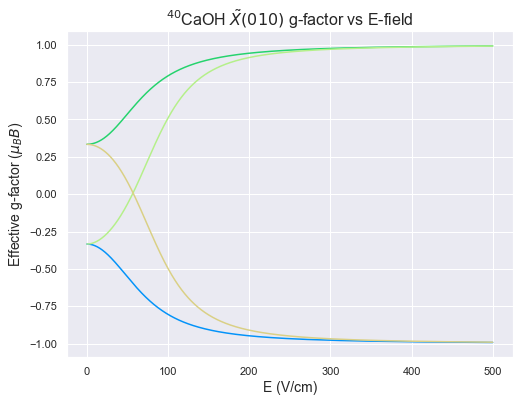

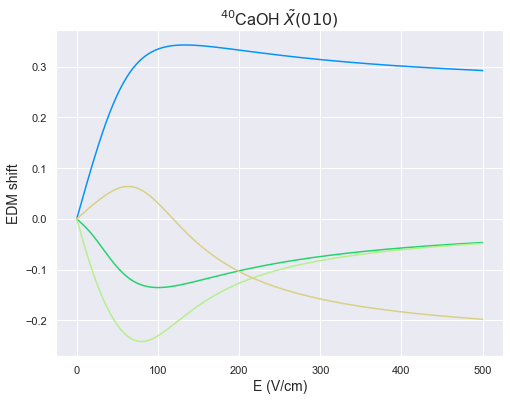

In [86]:
j = range(len(X010.evals0))
plt.figure(figsize=(8,6))
for i in range(len(X010.g_eff_E.T)):#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.figure(figsize=(8,6))
for i in range(len(X010.g_eff_E.T)):#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010.PTV_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str,fontsize=16);

In [81]:
X010.eigensystem(0,1e-6)
M_idx = X010.select_q({'M':[1/2]})
print(M_idx)

[0 1 2 3]


IndexError: index 4 is out of bounds for axis 0 with size 4

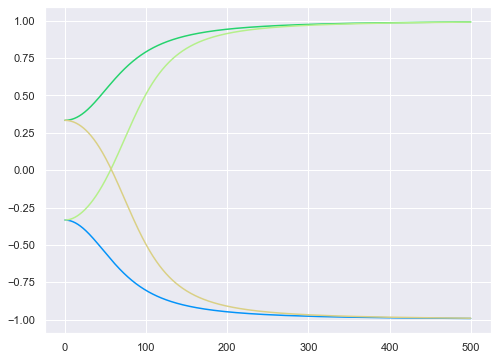

In [87]:
j = range(len(X010.evals0))
plt.figure(figsize=(8,6))
for i in range(10):#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.xlim(53,73)
plt.figure(figsize=(8,6))
for i in range(12):#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010.PTV_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str,fontsize=16);
plt.xlim(53,73);

In [175]:
for j in [12,18]:
    g_eff = X010.g_eff_E.T[j]
    for i in range(1,len(g_eff)):
        if (g_eff[i]>0 and g_eff[i-1]<0) or g_eff[i]<0 and g_eff[i-1]>0:
            print('idx =',j)
            print('E field =',(Ez[i]+Ez[i-1])/2)
            print('PTV =,',(X010.PTV_E.T[j][i]+X010.PTV_E.T[j][i-1])/2)
            print('Energy =',(X010.evals_E.T[j][i]+X010.evals_E.T[j][i-1])/2)

idx = 12
E field = 60.83108310831083
PTV =, -0.22727988
Energy = 10008.053070099853
idx = 18
E field = 65.28152815281528
PTV =, 0.070567485
Energy = 10030.921999206803


In [196]:
X010.eigensystem(1000,1e-7)
M_idx = X010.select_q({'M':[0]})
idx = M_idx
for i in idx:
    print(idx)
    print(X010.g_eff_EB()[i])
    display(Latex('$E = '+str(np.round(X010.evals0[i],4))+r'\:\mathrm{MHz}$'))
    print('Decoupled:')
    display(Latex(X010.gen_state_str(i,basis='decoupled',thresh=0.05,label_q=['K','M_N','M_S','M_I','M_F'],round=4)))
    print('Case A:')
    display(Latex(X010.gen_state_str(i,basis='aBJ',thresh=0.05,label_q=['J','K','Sigma','P','M'],round=4)))
    print('Case B:')
    display(Latex(X010.gen_state_str(i,thresh=0.05,round=4)))
    print('\n')

[ 2  3  8 11 12 15 18 19]
3.8988801882439546e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
7.797760376487909e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-1.2996267294146515e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-2.599253458829303e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-1.2996267294146515e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-3.8988801882439546e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
-2.599253458829303e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>



[ 2  3  8 11 12 15 18 19]
1.2996267294146515e-05


<IPython.core.display.Latex object>

Decoupled:


<IPython.core.display.Latex object>

Case A:


<IPython.core.display.Latex object>

Case B:


<IPython.core.display.Latex object>

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, EDM shifts at 65.28 V/cm')

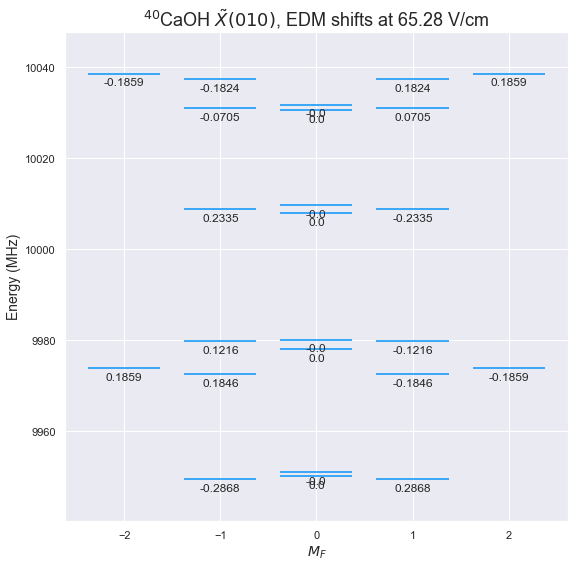

In [179]:
X010.display_PTV(65.28,1e-7,'EDM',round=4)
plt.title(X010.state_str+', EDM shifts at 65.28 V/cm',fontsize=18)

[ 1  3  5  9 13 15 17 21]
1 1.45e-05 499.7999799979998
3 1.45e-05 499.74997499749975
5 1.3e-07 105.06050605060506
9 1.3e-07 90.65906590659066
13 1.6e-07 105.71057105710571
15 1.8e-07 106.66066606660665
17 1.149e-05 499.8999899989999
21 1.149e-05 499.84998499849985


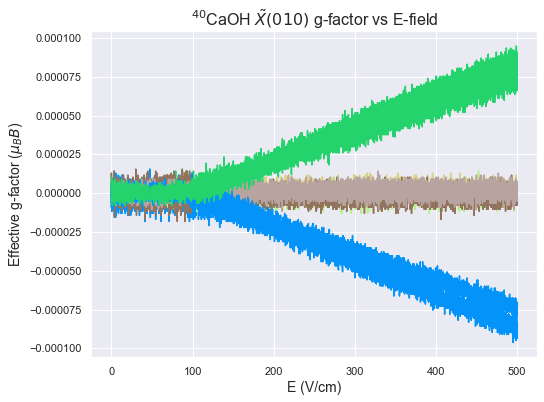

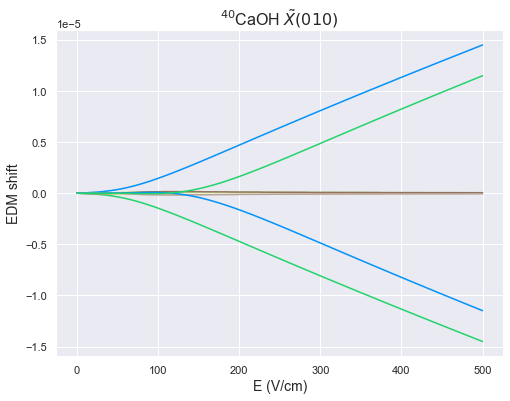

In [192]:
X010.eigensystem(0,1e-6)
M_idx = X010.select_q({'M':[0]})
print(M_idx)

j = range(len(X010.evals0))
plt.figure(figsize=(8,6))
for i in M_idx:#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Effective g-factor ($\mu_B B$)',fontsize=14)
plt.title(X010.state_str + ' g-factor vs E-field',fontsize=16);
plt.figure(figsize=(8,6))
for i in M_idx:#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010.PTV_E.T[i])
    print(i,max(abs(X010.PTV_E.T[i])),Ez[np.argmax(abs(X010.PTV_E.T[i]))])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(X010.state_str,fontsize=16);

Text(0.5, 1.0, '$^{40}$CaOH $\\tilde{X}(010)$, EDM shifts at 1000 V/cm and 10 mG')

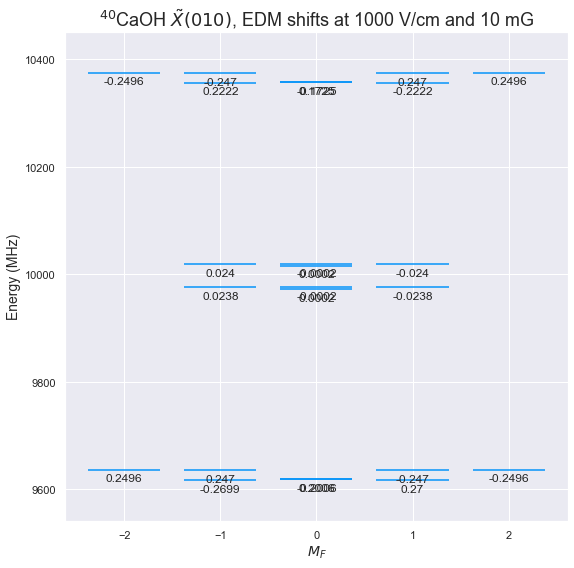

In [199]:
X010.display_PTV(1000,1e-2,'EDM',round=4)
plt.title(X010.state_str+', EDM shifts at 1000 V/cm and 10 mG',fontsize=18)

In [105]:
import time
X010_p = MoleculeLevels.initialize_state('CaOH','40','X010',N_list,M_values = 'custom',I=[0,1/2],S=1/2,round=8,M_range=[1])

Bz = np.linspace(1e-6,20,1000)
Ez = np.linspace(0,500,1000)
t0 = time.perf_counter()
Bslices_p = X010_p.EB_grid(Ez,Bz,PTV=True,E_or_B_first='B',output=True,EDM_or_MQM='EDM')
t1 = time.perf_counter()
elapsed = t1 - t0
print(elapsed, 'sec')

25.03476210000008 sec


In [49]:
import json
import ujson as uj

def get_json_data(file_path,numpy=False,ujson=True):
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path, 'r') as f:
        if ujson:
            data = uj.load(f)
        else:
            data = json.load(f)
    if numpy:
        data = np.array(data)
    return data

def save_json_data(data,file_path,ujson=True):
    if type(data) is np.ndarray:
        data_save = data.tolist()
    else:
        data_save=data
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path,'w') as f:
        if ujson:
            uj.dump(data_save,f)
        else:
            json.dump(data_save,f)
    print('Data saved to', file_path)

In [50]:
# save_json_data(Bslices[0].tolist(),'X010_CaOH_Mpm0p5_EB_grid_evals_20220306')
# save_json_data(Bslices[1].tolist(),'X010_CaOH_Mpm0p5_EB_grid_PTV_20220306')

In [106]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  """


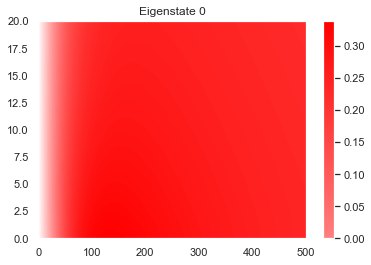

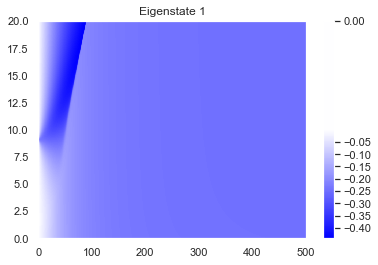

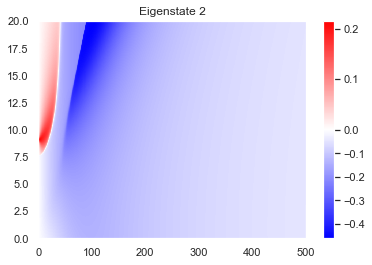

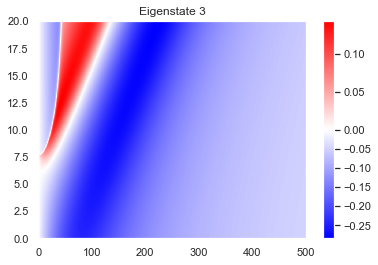

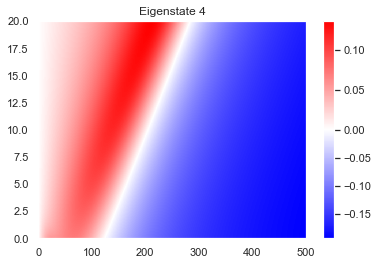

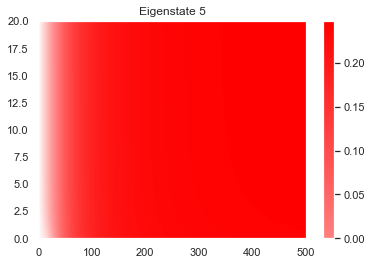

In [107]:
from matplotlib.colors import TwoSlopeNorm
for i in range(len(Bslices_p[0])):
    plt.figure()
    plt.pcolormesh(*mesh,Bslices_p[1][i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(0))
    plt.colorbar()
    plt.title('Eigenstate {}'.format(i))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


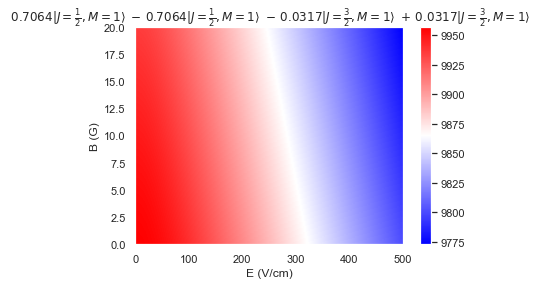

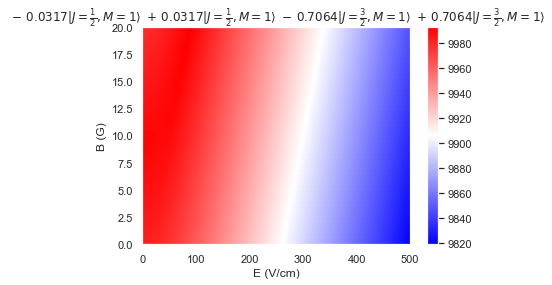

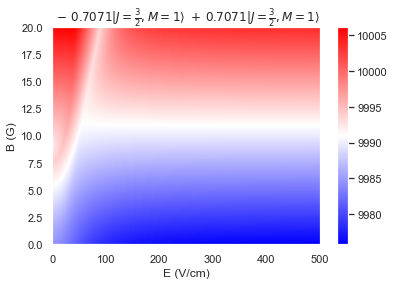

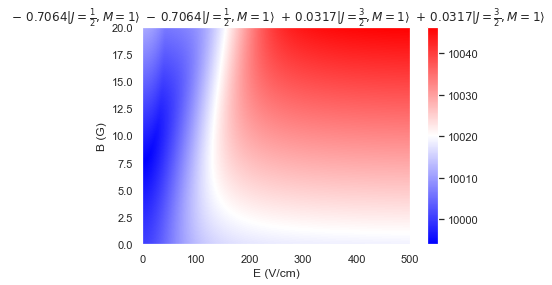

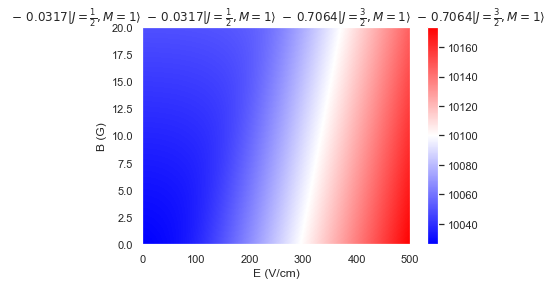

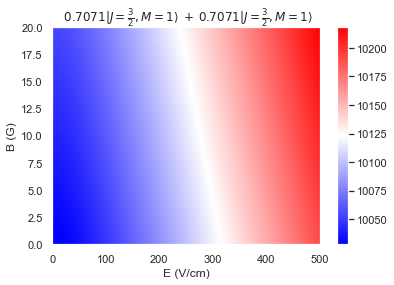

In [108]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices_p[0])):
    plt.figure()
    plt.grid(False)
    plt.pcolormesh(*mesh,Bslices_p[0][i],shading='auto',cmap='bwr')
    plt.colorbar()
    plt.title(X010_p.gen_state_str(i,round=4,label_q=['J','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [73]:
np.gradient(Bslices_p[0][0])[1]/(Bz[1]-Bz[0])

array([[-5355728.85423, -2678181.5899 , -1339206.26323, ...,
           -7655.38735,    -7654.93535,    -7654.7095 ],
       [-5355531.53913, -2678082.64793, -1339156.52261, ...,
           -7655.38253,    -7654.93054,    -7654.70469],
       [-5354934.98431, -2677784.10418, -1339007.56767, ...,
           -7655.36806,    -7654.91609,    -7654.69025],
       ...,
       [  -30677.45953,   -17459.08086,   -10543.94911, ...,
           -7165.79655,    -7165.78812,    -7165.7839 ],
       [  -30660.62245,   -17451.45616,   -10540.68135, ...,
           -7165.76865,    -7165.76022,    -7165.75601],
       [  -30643.80722,   -17443.84186,   -10537.41838, ...,
           -7165.74078,    -7165.73236,    -7165.72816]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  import sys


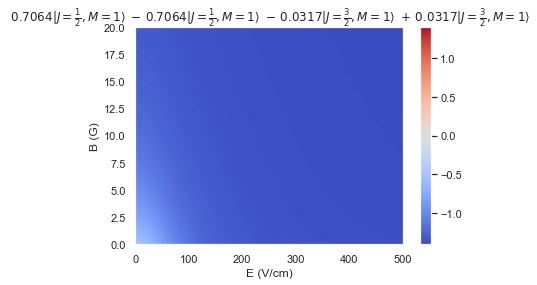

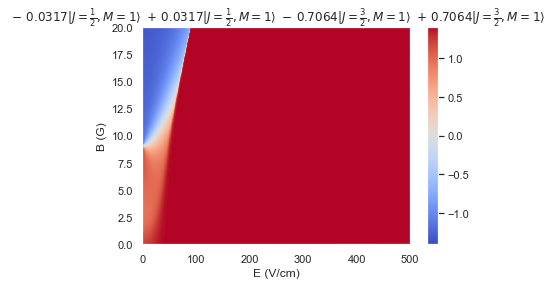

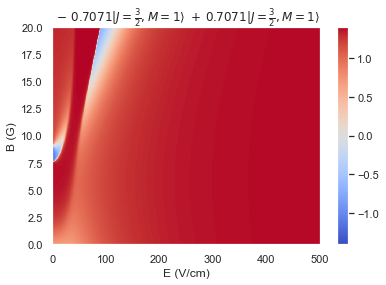

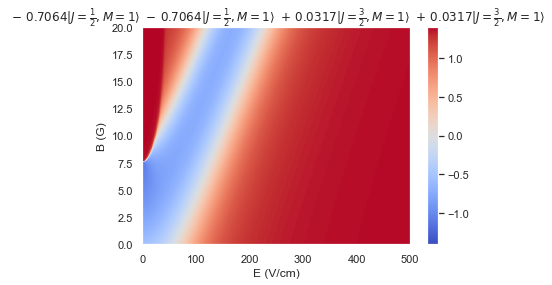

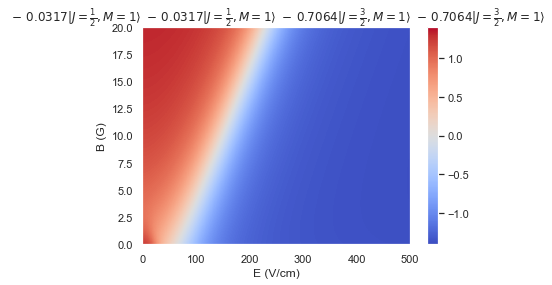

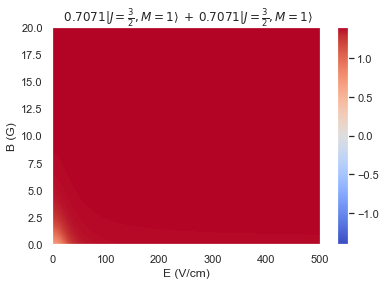

In [109]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices_p[0])):
    geff = np.gradient(Bslices_p[0][i])[1]/(Bz[1]-Bz[0])
    plt.figure()
    plt.grid(False)
    plt.pcolormesh(*mesh,geff,shading='auto',cmap='coolwarm',vmin=-1.4,vmax=1.4)
    plt.colorbar()
    plt.title(X010_p.gen_state_str(i,round=4,label_q=['J','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [97]:
np.log10(-0.01)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  import sys


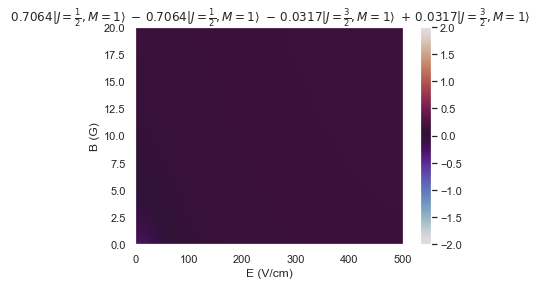

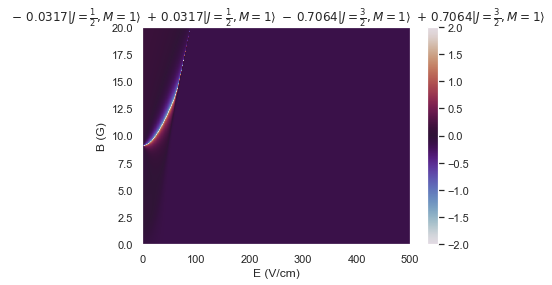

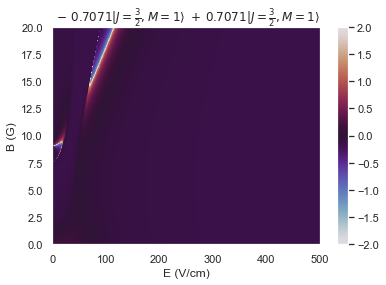

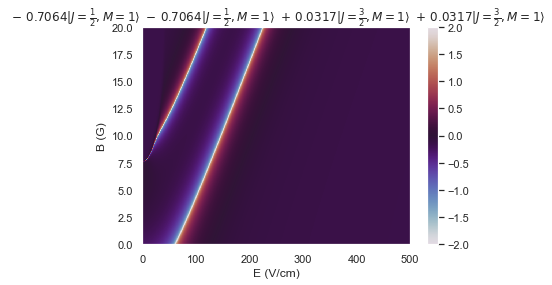

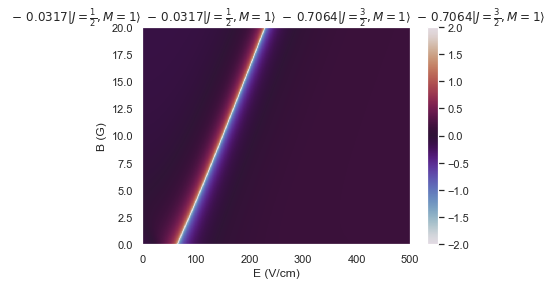

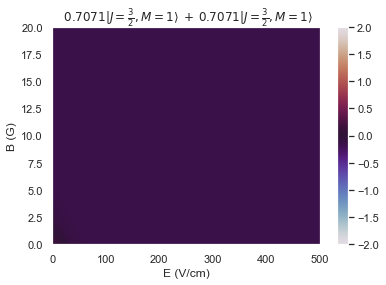

In [110]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(Bslices_p[0])):
    geff = np.gradient(Bslices_p[0][i])[1]/(Bz[1]-Bz[0])
    plt.figure()
    plt.grid(False)
    plt.pcolormesh(*mesh,-np.sign(geff)*np.log10(abs(geff)),shading='auto',cmap='twilight',vmin=-2,vmax=2)
    plt.colorbar()
    plt.title(X010_p.gen_state_str(i,round=4,label_q=['J','M']))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')